In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path = r"C:\Users\ijona\Desktop\BE-Mini-Project\feta_2.4\sub-001\anat\sub-001_rec-mial_T2w.nii.gz"
img = nib.load(file_path)
# blured :- sub-001_rec-mial_dseg.nii.gz

In [4]:
mask = nib.load(file_path).get_fdata()

print(f"Unique values in mask: {np.unique(mask)}")
print(f"Min: {mask.min()}, Max: {mask.max()}")
print(f"Data type: {mask.dtype}")

Unique values in mask: [0.000e+00 1.000e+00 2.000e+00 ... 1.560e+03 1.582e+03 1.588e+03]
Min: 0.0, Max: 1588.0
Data type: float64


In [3]:
data = img.get_fdata()

In [4]:
print(data.shape)

(256, 256, 256)


In [5]:
print("Shape of image:", data.shape)   # (x, y, z) volume
print("Data type:", data.dtype)

Shape of image: (256, 256, 256)
Data type: float64


In [6]:
def pick_slices(data, axis, n=2):
    """Pick n slices from given axis where mean intensity > 0"""
    means = data.mean(axis=tuple(i for i in range(3) if i != axis))
    nonzero_indices = np.where(means > 0)[0]
    if len(nonzero_indices) < n:
        return [data.shape[axis] // 2] * n  # fallback: center slices
    # evenly space picks across nonzero region
    picks = np.linspace(nonzero_indices[0], nonzero_indices[-1], n+2, dtype=int)[1:-1]
    return picks

## 56 sagittal slices (left ↔ right through the head)

## 256 coronal slices (front ↔ back)

## 256 axial slices (top ↔ bottom)

In [7]:
sagittal_slices = pick_slices(data, axis=0, n=2)
coronal_slices  = pick_slices(data, axis=1, n=2)
axial_slices    = pick_slices(data, axis=2, n=2)

In [8]:
print("Sagittal slices:", sagittal_slices)
print("Coronal slices:", coronal_slices)
print("Axial slices:", axial_slices)

Sagittal slices: [ 55 107]
Coronal slices: [ 66 128]
Axial slices: [ 54 108]


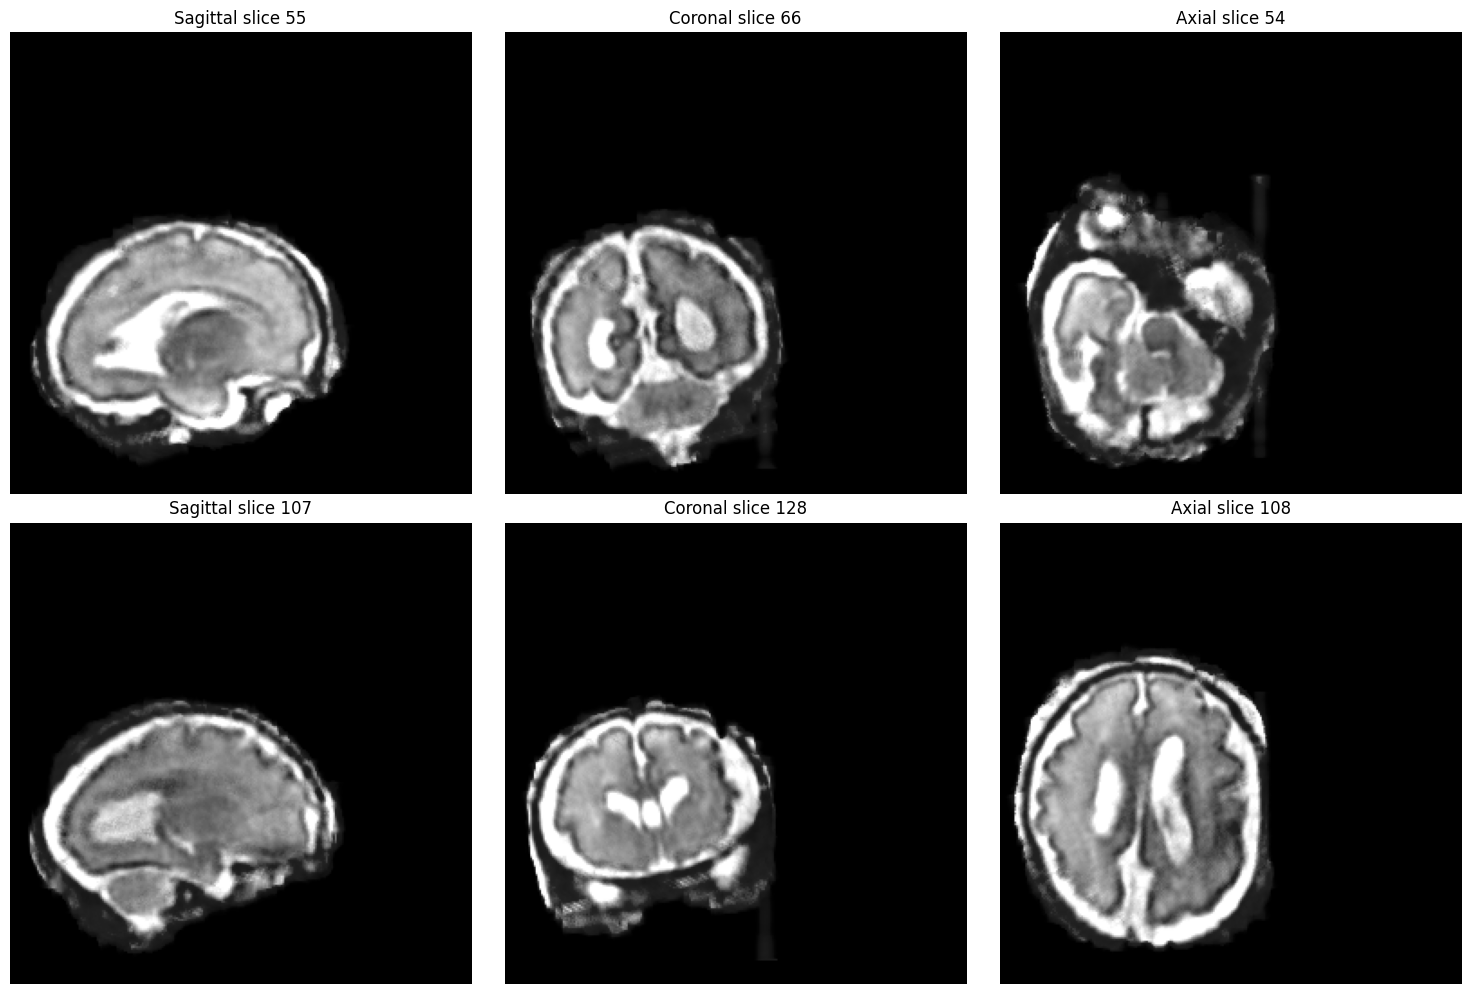

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Sagittal
for i, idx in enumerate(sagittal_slices):
    ax = axes[i, 0]
    ax.imshow(data[idx, :, :].T, cmap="gray", origin="lower",
              vmin=np.percentile(data, 1), vmax=np.percentile(data, 99))
    ax.set_title(f"Sagittal slice {idx}")
    ax.axis("off")

# Coronal
for i, idx in enumerate(coronal_slices):
    ax = axes[i, 1]
    ax.imshow(data[:, idx, :].T, cmap="gray", origin="lower",
              vmin=np.percentile(data, 1), vmax=np.percentile(data, 99))
    ax.set_title(f"Coronal slice {idx}")
    ax.axis("off")

# Axial
for i, idx in enumerate(axial_slices):
    ax = axes[i, 2]
    ax.imshow(data[:, :, idx].T ,cmap="gray", origin="lower",
              vmin=np.percentile(data, 1), vmax=np.percentile(data, 99))
    ax.set_title(f"Axial slice {idx}")
    ax.axis("off")

plt.tight_layout()
plt.show()